In [1]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(2,2) # 2 qubits, 2 classical bits 

In [2]:
circuit.x(0) # “x” is a “not” gate. It flips the value. Starting value is a 0, so this flips to a 1. 
circuit.cx(0, 1) #cnot, controlled not, Flips 2nd qubit’s value if first qubit is 1
circuit.measure([0,1], [0,1]) # ([qbitregister], [classicalbitregister]) Measure qubit 0 and 1 to classical bits 0 and 1

In [3]:
circuit.draw() # text-based visualization. (pretty cool …actually! Nice job whoever did this.)

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

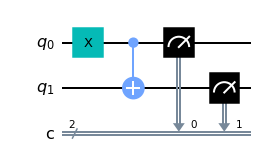

In [4]:
circuit.draw(output='mpl') # mpl-based visualization. (pretty cool …actually! Nice job whoever did this.)

In [5]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
# Save an IBM Quantum account.
QiskitRuntimeService.save_account(channel="ibm_quantum", token="0cf1fc8bbf33adb8b087bbf30f7c7cb761201b704814ee053718104ae51b4ab79afa5f5e2c9af86465d037b552d319203b93b9059310fd6062fa3738cca5a7be" , overwrite=True)

In [6]:
# Load saved credentials
service = QiskitRuntimeService()

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService, Options, Sampler
from qiskit import QuantumCircuit

options = Options(optimization_level=1)
options.execution.shots = 1024  # Options can be set using auto-complete.

# 1. A quantum circuit for preparing the quantum state (|00> + |11>)/rt{2}
bell = QuantumCircuit(2)
bell.h(0)
bell.cx(0, 1)

# 2. Map the qubits to a classical register in ascending order
bell.measure_all()

# 3. Execute using the Sampler primitive
backend = service.get_backend('ibm_lagos')
sampler = Sampler(backend=backend, options=options)
job = sampler.run(circuits=bell)
print(f"Job ID is {job.job_id()}")
print(f"Job result is {job.result()}")

Job ID is cmjgnbn0t6t00085ygh0
